# Imports

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

# Reading data

In [6]:
pd.set_option('display.max_columns', 25)
df = pd.read_csv('C:/Users/Ayron/repos/Datasets/kc_house_data.csv')

In [30]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house


In [8]:
df.shape

(21613, 21)

# Manipulação dos dados

### 1	Crie uma nova coluna chamada: “dormitory_type”
* Se o valor da coluna “bedrooms” for igual a 1 => ‘studio’
* Se o valor da coluna “bedrooms” for igual a 2 => ‘apartment’
* Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [10]:
df['dormitory_type'] = 'house'
df.loc[df.bedrooms == 1, 'dormitory_type'] = 'studio'
df.loc[df.bedrooms == 2, 'dormitory_type'] = 'apartment'

In [13]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartment


### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

<BarContainer object of 13 artists>

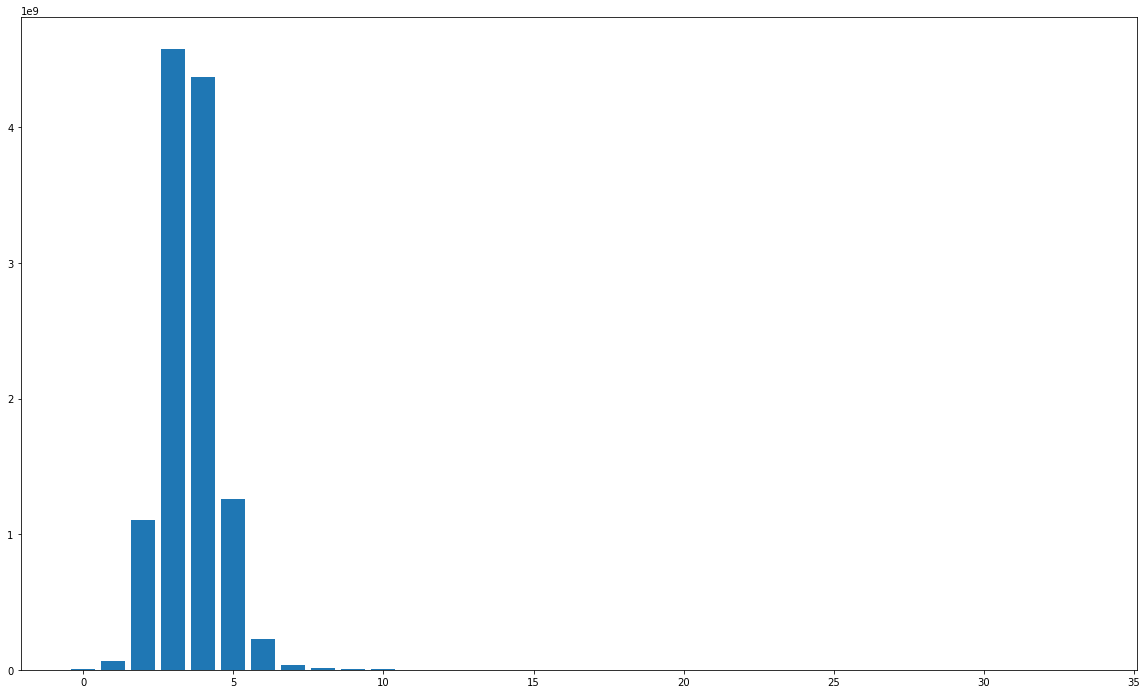

In [29]:
#Filtra e soma os preços por quarto.
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
#Eixo X: quartos
#Eixo Y: price
#Grafico: Barras
plt.figure(figsize=(20, 12))
plt.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

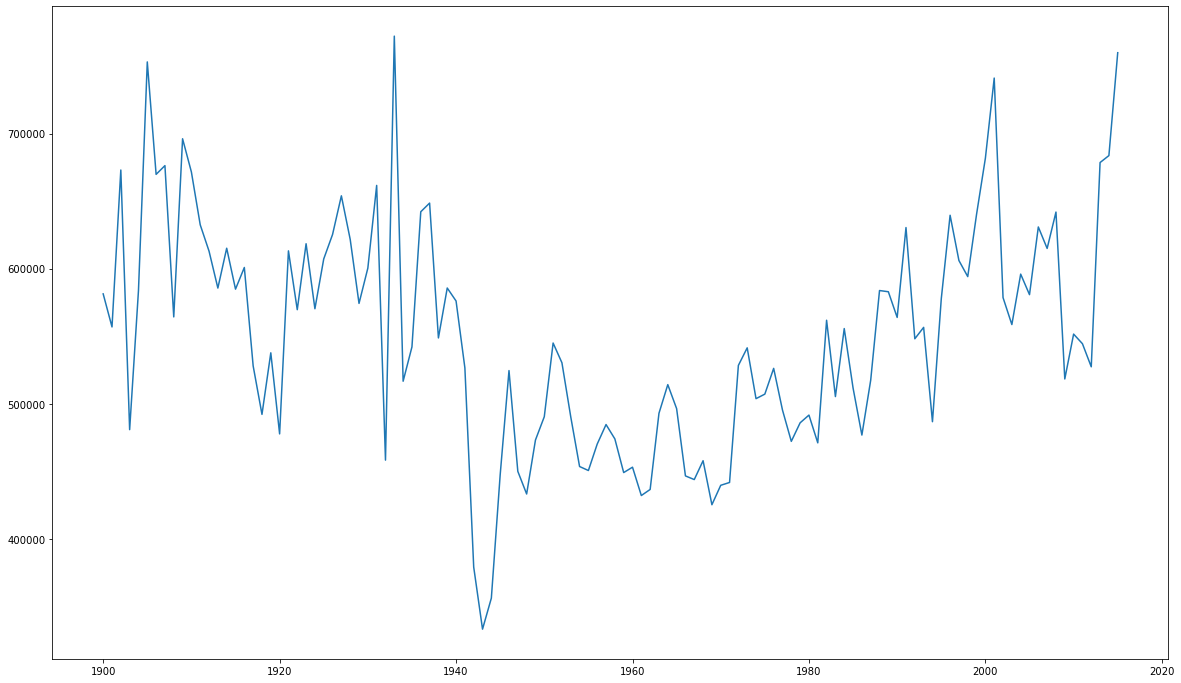

In [37]:
#Filtra e faz a média dos preços por ano de construção.
by_year = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
#Eixo X: yr_built
#Eixo Y: price
#Grafico: Linhas
plt.figure(figsize=(20, 12)) #Tamanho do grafico
plt.plot(by_year['yr_built'], by_year['price'])

### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<BarContainer object of 3 artists>

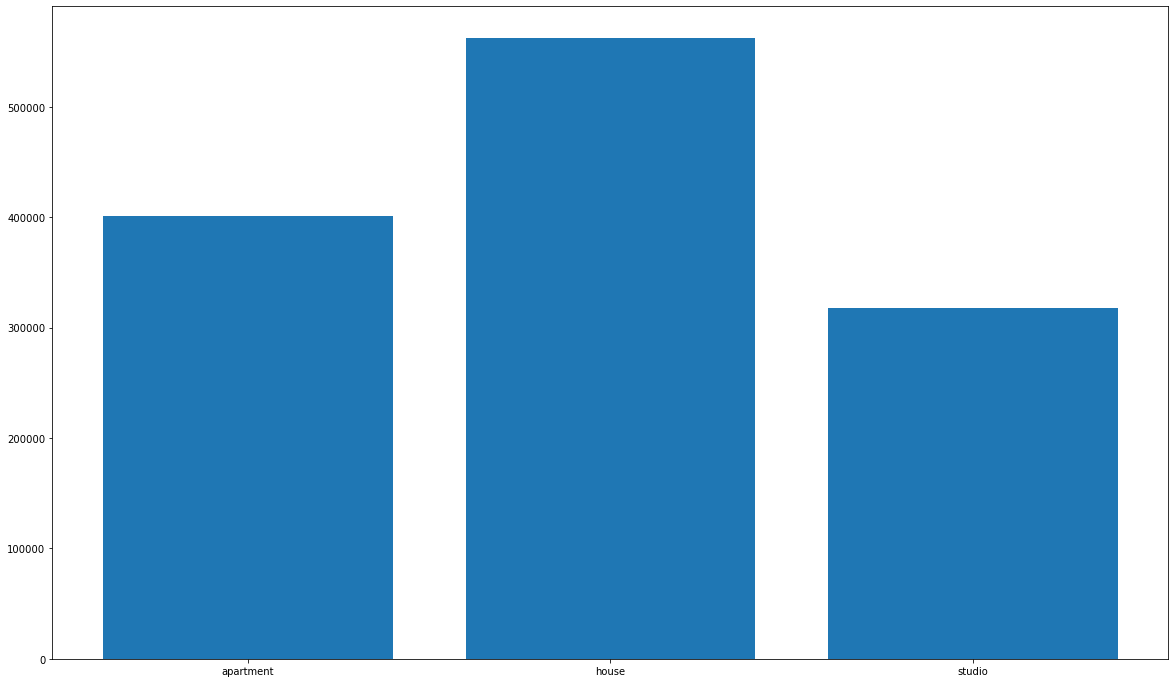

In [35]:
#Filtra e faz a média dos preços por quantidade de dormmitórios.
by_dorm_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
#Eixo X: tipo dormitorio
#Eixo Y: price
#Grafico: Barras
plt.figure(figsize=(20,12))
plt.bar(by_dorm_type['dormitory_type'], by_dorm_type['price'])

### 5. Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

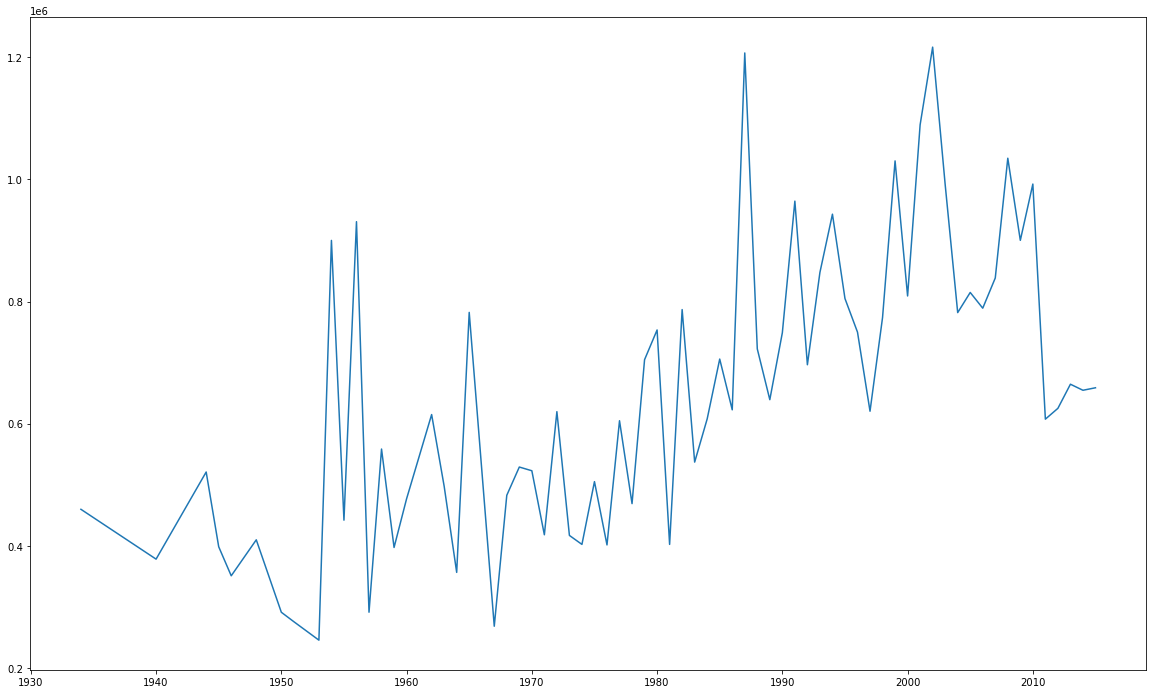

In [54]:
#Filtra a feature do ano de reforma a partir de 1930
novo_df = df[df['yr_renovated'] >= 1930]

#Agrupa e calcula a média dos preços.
by_renovated = novo_df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

#Cria o gráfico
plt.figure(figsize=(20,12))
plt.plot(by_renovated['yr_renovated'], by_renovated['price'])

### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [71]:
#Filtra e faz a média dos preços por ano de construção.
by_year = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()


### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 linha e 2 colunas)

### 8. Crie um Dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)

### 9. Crie um Dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)

### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.